In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
df.shape


(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [26]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [27]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Exploratory Data Analysis

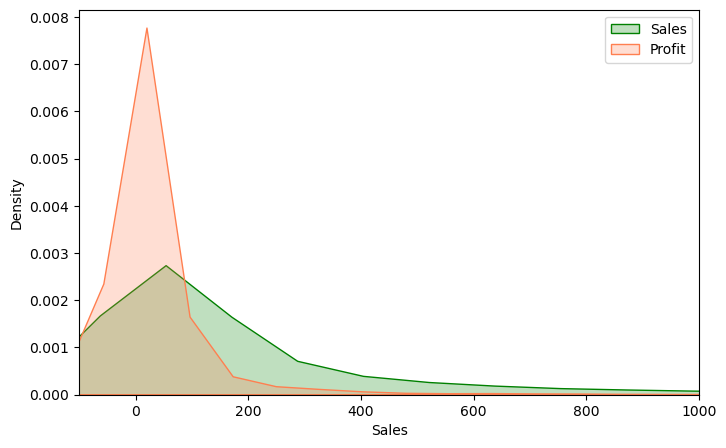

In [32]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color='green',label='Sales',shade=True)
sns.kdeplot(df['Profit'],color='coral',label='Profit',shade=True)
plt.xlim([-100,1000])
plt.legend()

Pairplot Analysis of each column based on the Category

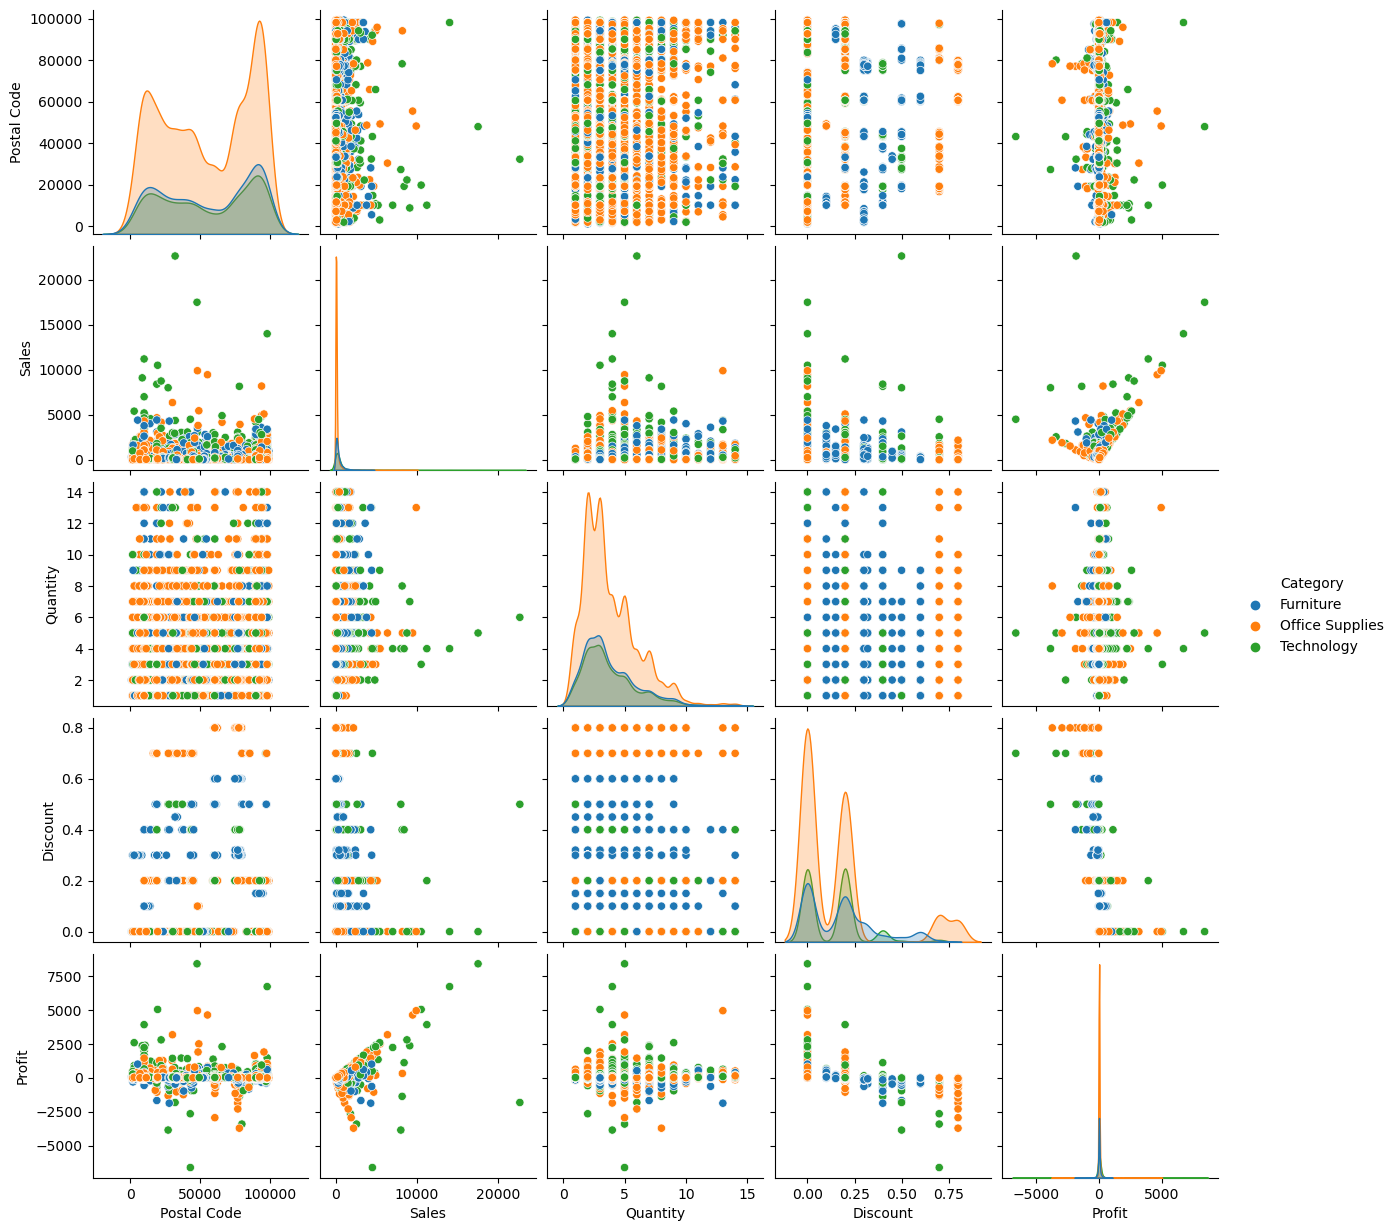

In [33]:
sns.pairplot(df,hue='Category')

Pairplot Analysis of each column based on the Region

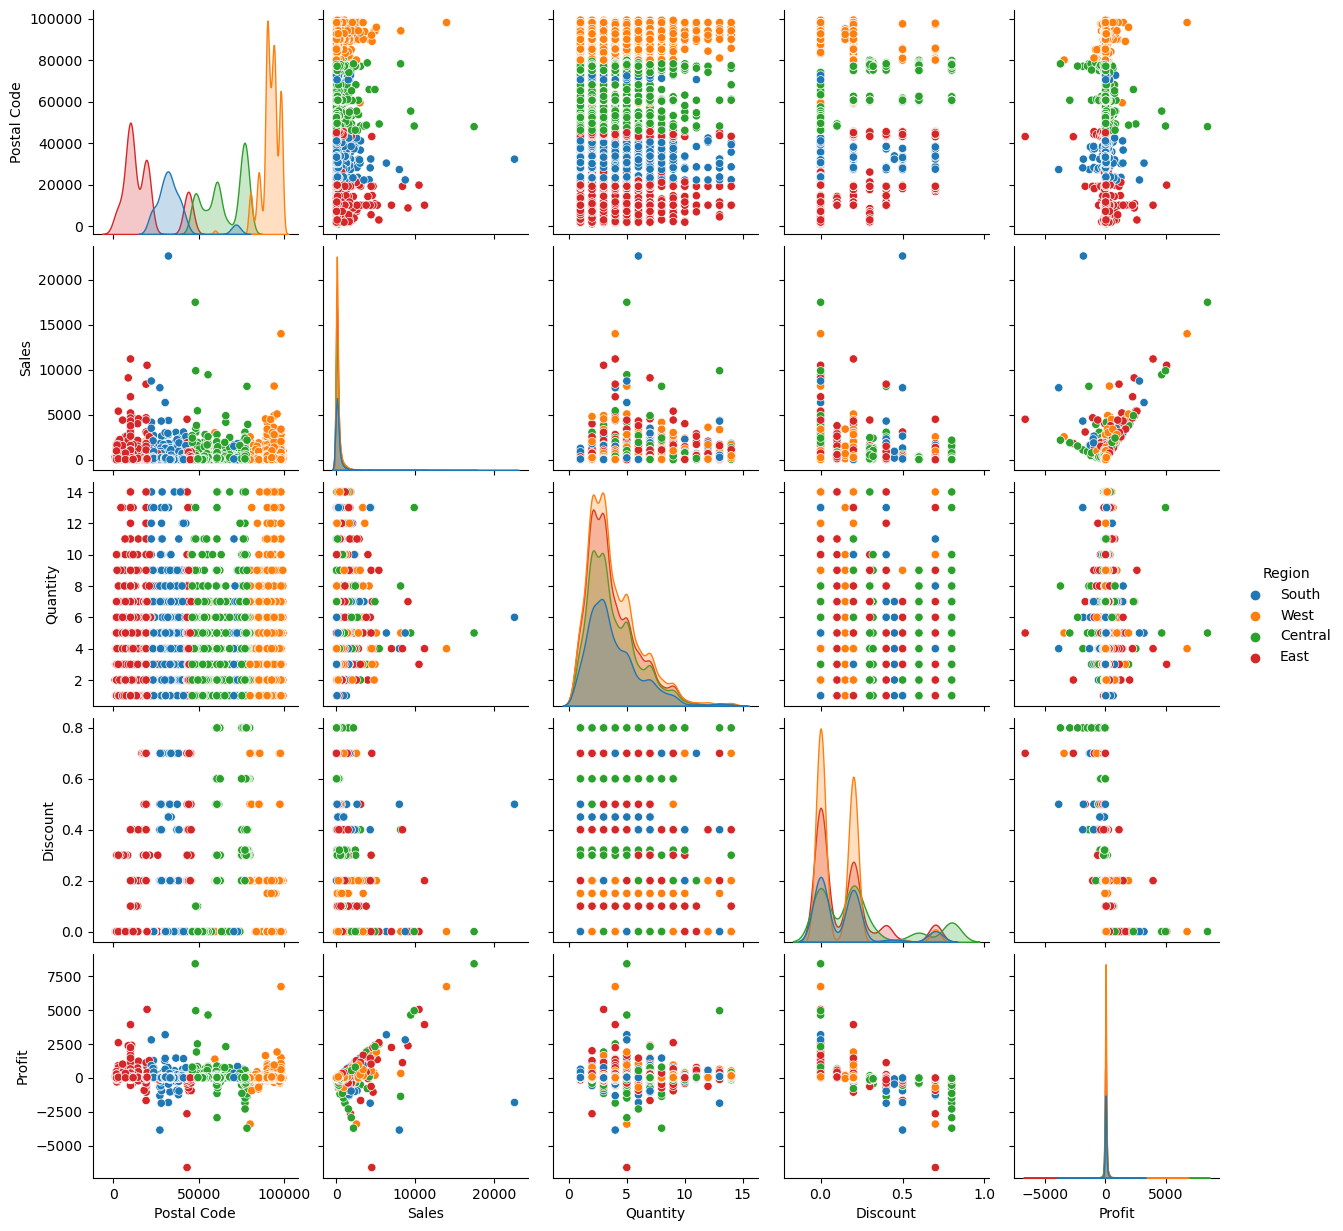

In [34]:
sns.pairplot(df,hue='Region')

Pairplot Analysis of each column based on the Segment

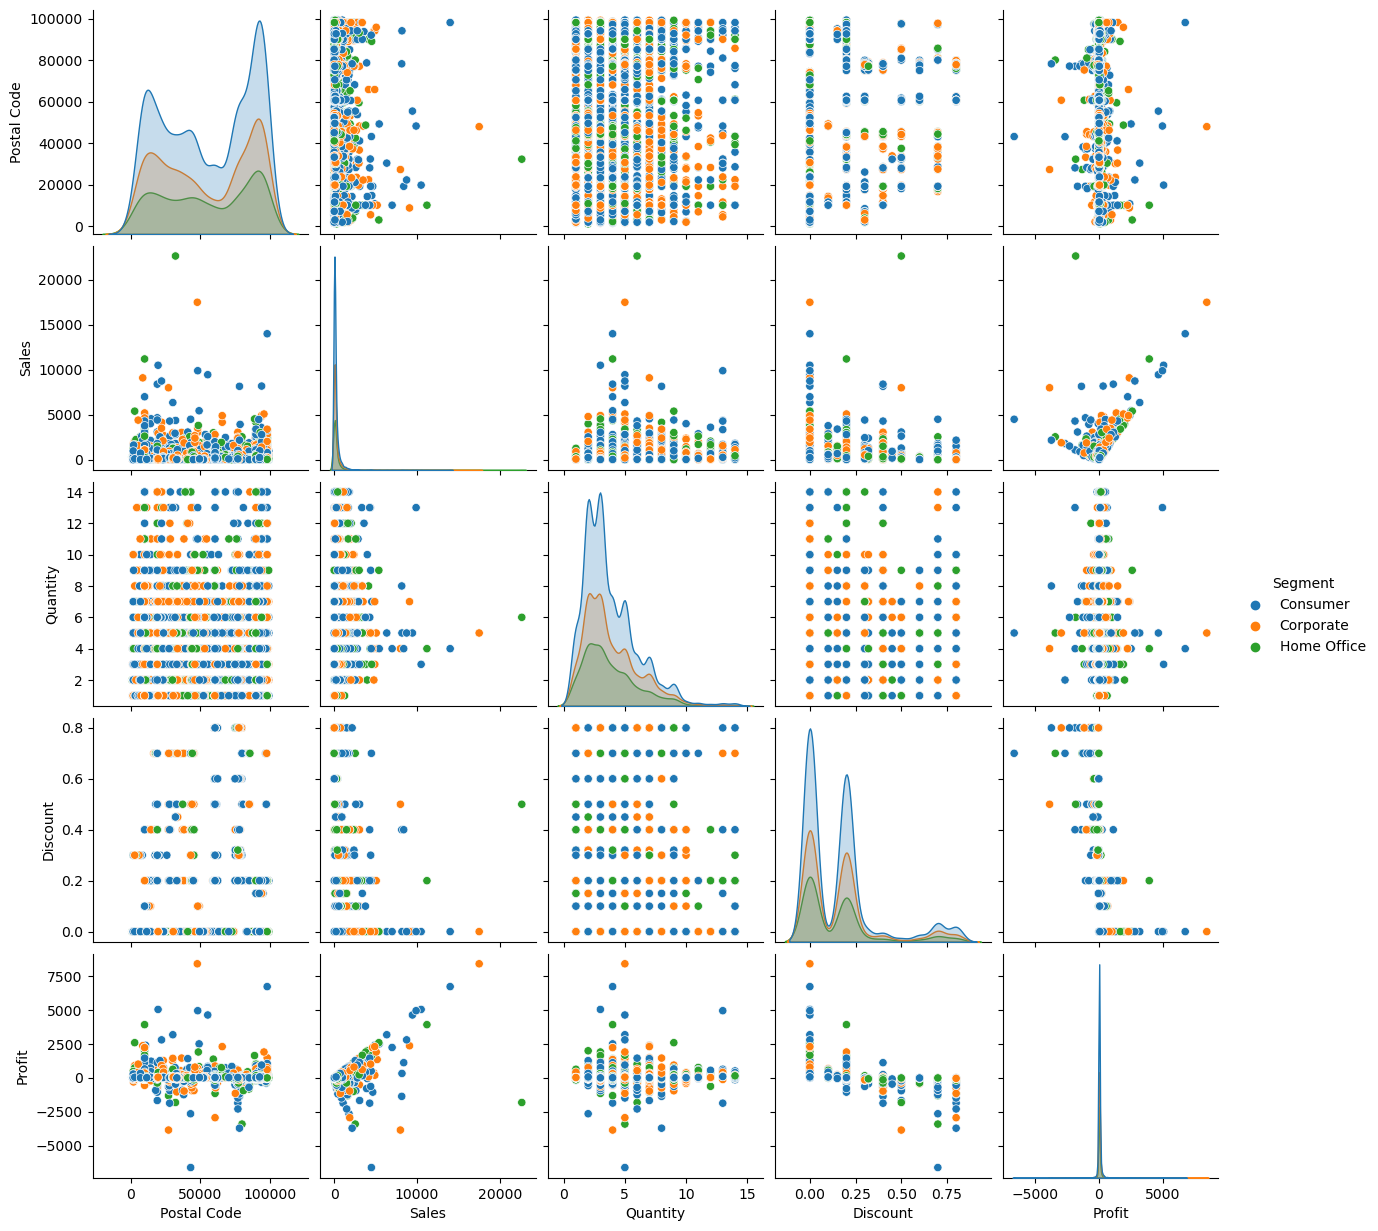

In [35]:
sns.pairplot(df,hue='Segment')

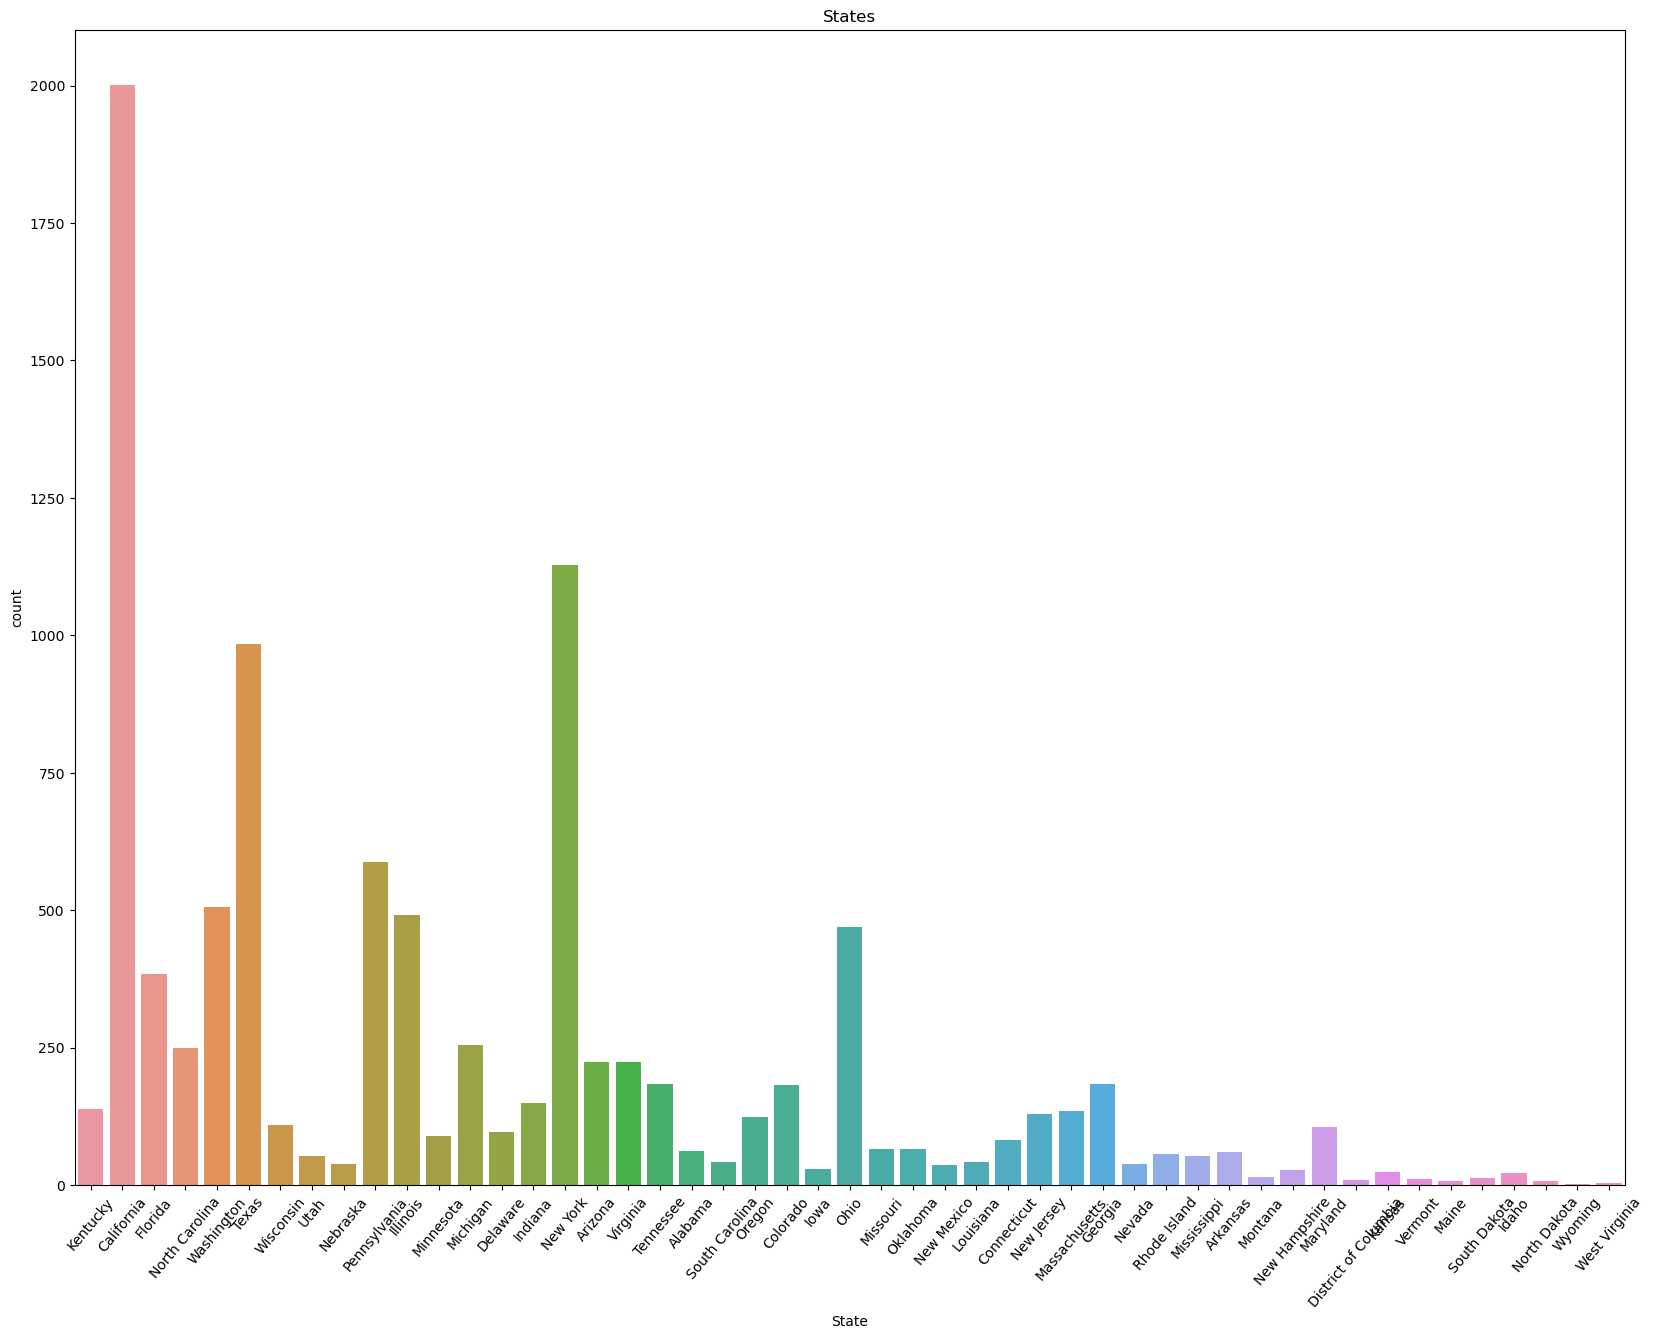

In [51]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['State'])
plt.xticks(rotation=50)
plt.title('States')
plt.show()

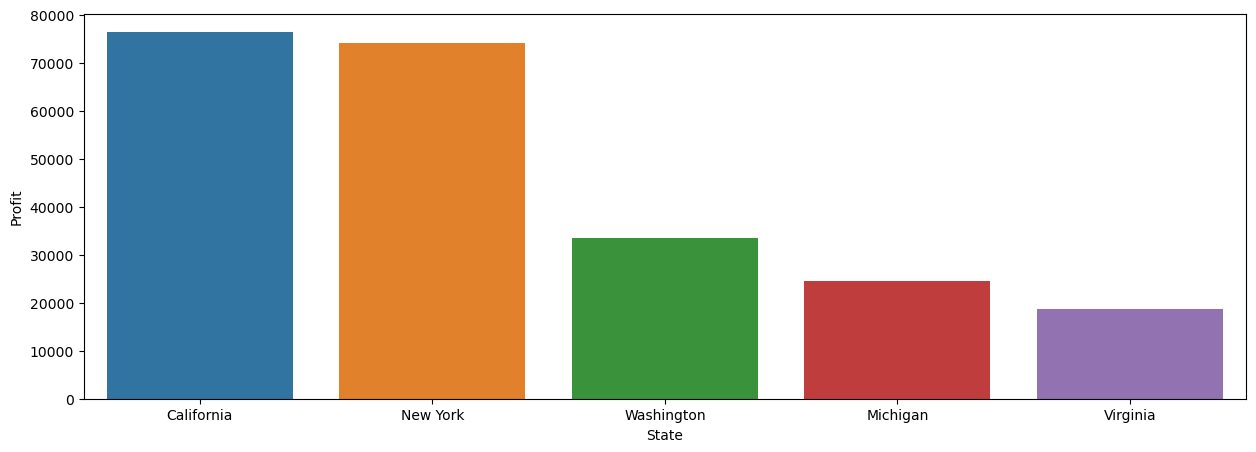

In [28]:
profit_by_State=df.groupby('State').sum().reset_index().sort_values('Profit',ascending=False)
top5_state_by_profit=profit_by_State[:5].loc[:,('State','Profit')]
plt.figure(figsize=(15,5))

sns.barplot(data=top5_state_by_profit,x='State',y='Profit')
plt.show()

In [12]:
profit_by_State_least=df.groupby('State').sum().reset_index().sort_values('Profit',ascending=True)

In [13]:
least5_state_by_profit=profit_by_State_least[:5].loc[:,('State','Profit')]

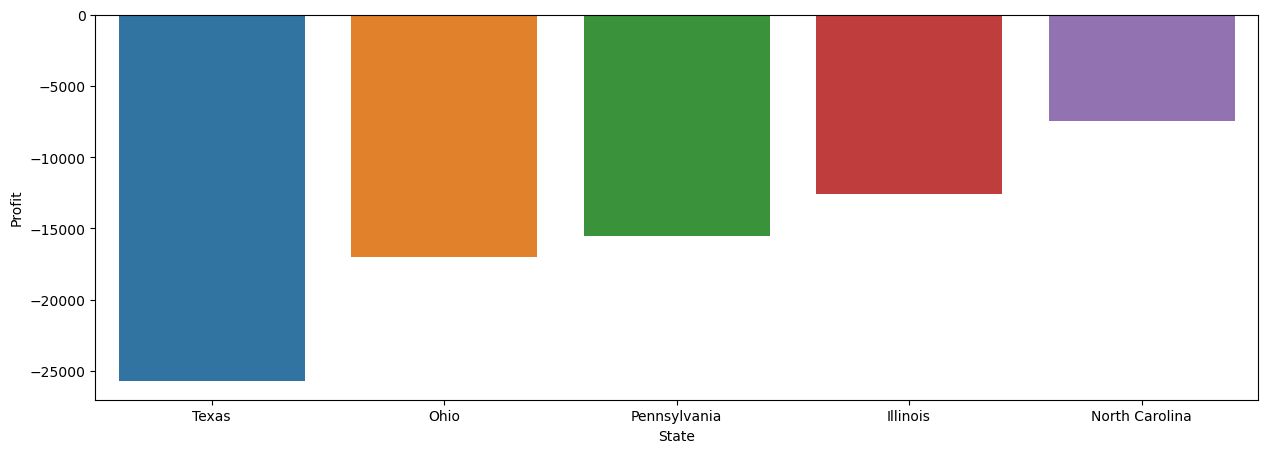

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(data=least5_state_by_profit,x='State',y='Profit')
plt.show()

In [15]:
profit_by_city=df.groupby('City').sum().reset_index().sort_values('Profit',ascending=False)

In [16]:
top10_cities=profit_by_city[:10]

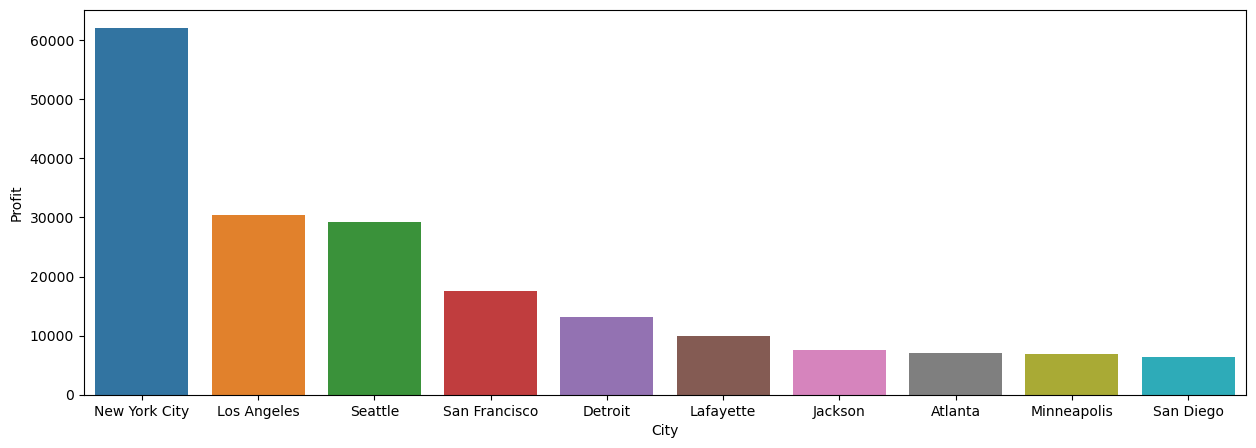

In [17]:
plt.figure(figsize=[15,5])
sns.barplot(data=top10_cities,x=('City'),y="Profit")
plt.show()

In [18]:
region=df.groupby('Region').sum().reset_index()

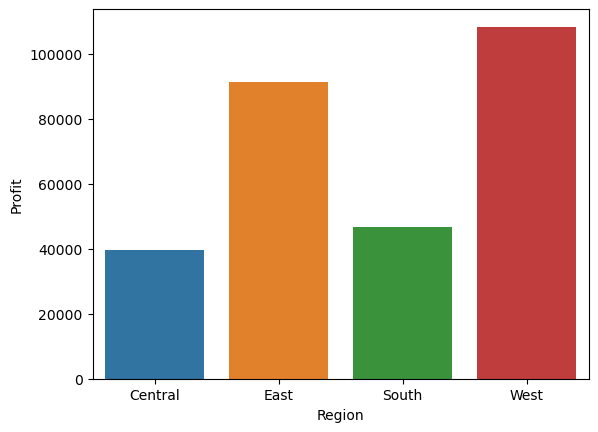

In [19]:
sns.barplot(data=region,x='Region',y='Profit')
plt.show()

In [20]:
category=df.groupby('Category').sum().reset_index().sort_values('Profit',ascending=False)

In [21]:
subcategory=df.groupby('Sub-Category').sum().reset_index().sort_values('Profit',ascending=False)

In [22]:
top_10_Category=category[:10]


In [23]:
top_10_subCategory=subcategory[:10]


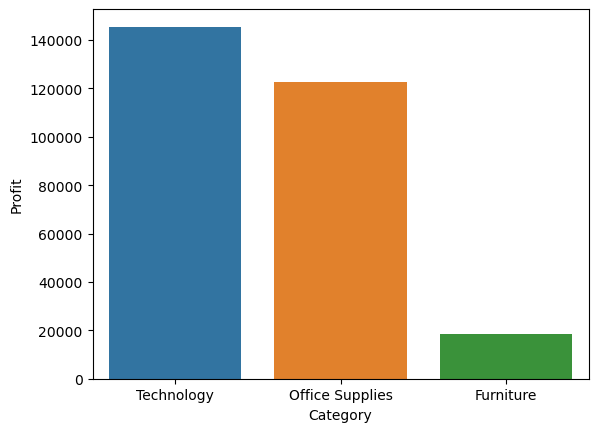

In [24]:
sns.barplot(data=top_10_Category,x='Category',y="Profit")
plt.show()

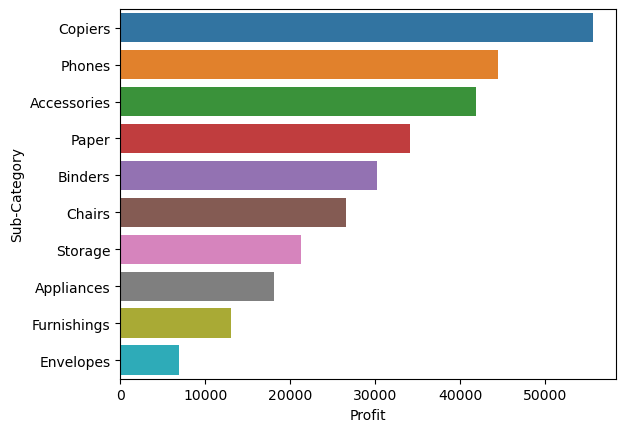

In [25]:
sns.barplot(data=top_10_subCategory,x='Profit',y="Sub-Category")
plt.show()

In [43]:
def state_data_viewer(states):

    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig,ax =plt.subplots(1, 3, figsize= (30,4))
        fig.suptitle(state, fontsize=14)
        ax_index =0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x=cat_data.Profit, y= cat_data.index, ax =ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index+=1
        
        fig.show()

C:\Users\venka\AppData\Local\Temp\ipykernel_11520\4003850826.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\venka\AppData\Local\Temp\ipykernel_11520\4003850826.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\venka\AppData\Local\Temp\ipykernel_11520\4003850826.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\venka\AppData\Local\Temp\ipykernel_11520\4003850826.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\venka\AppData\Local\Temp\ipykernel_11520\4003850826.py:20: UserWarning: Matplotlib is currently using m

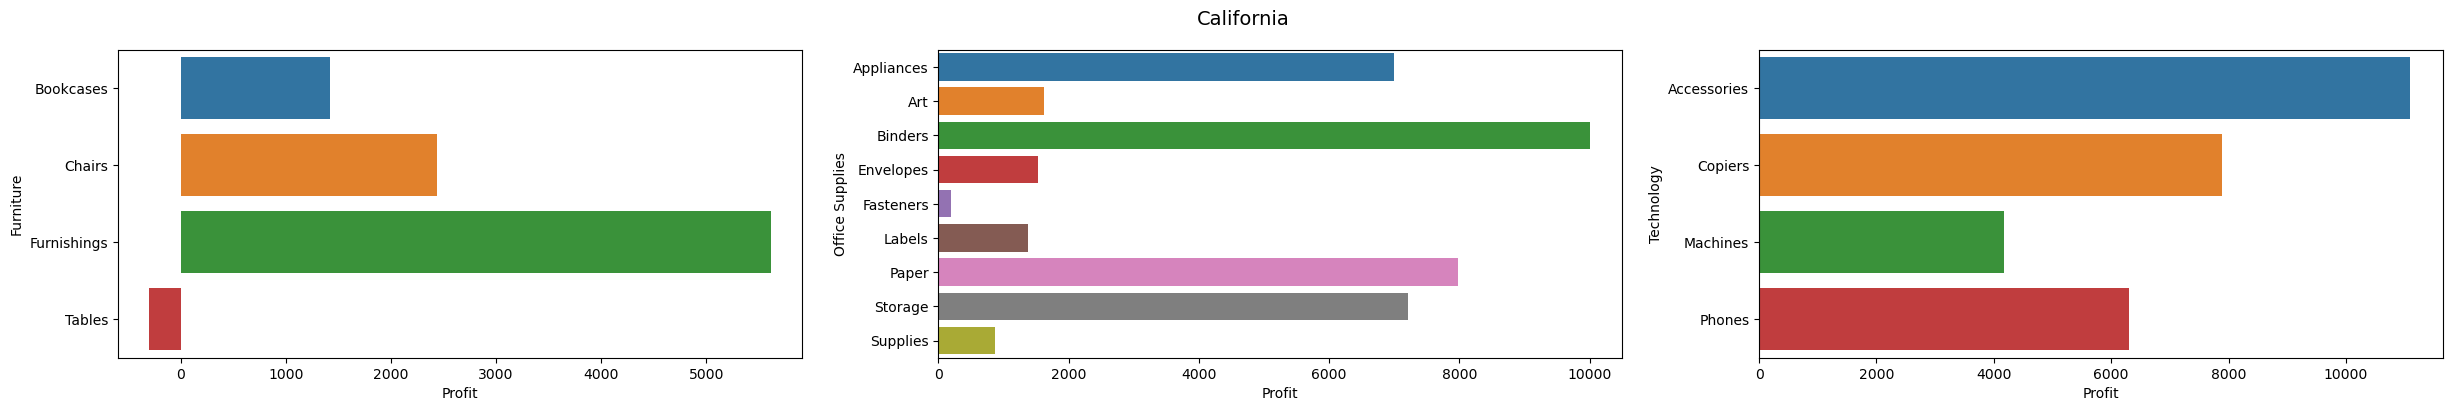

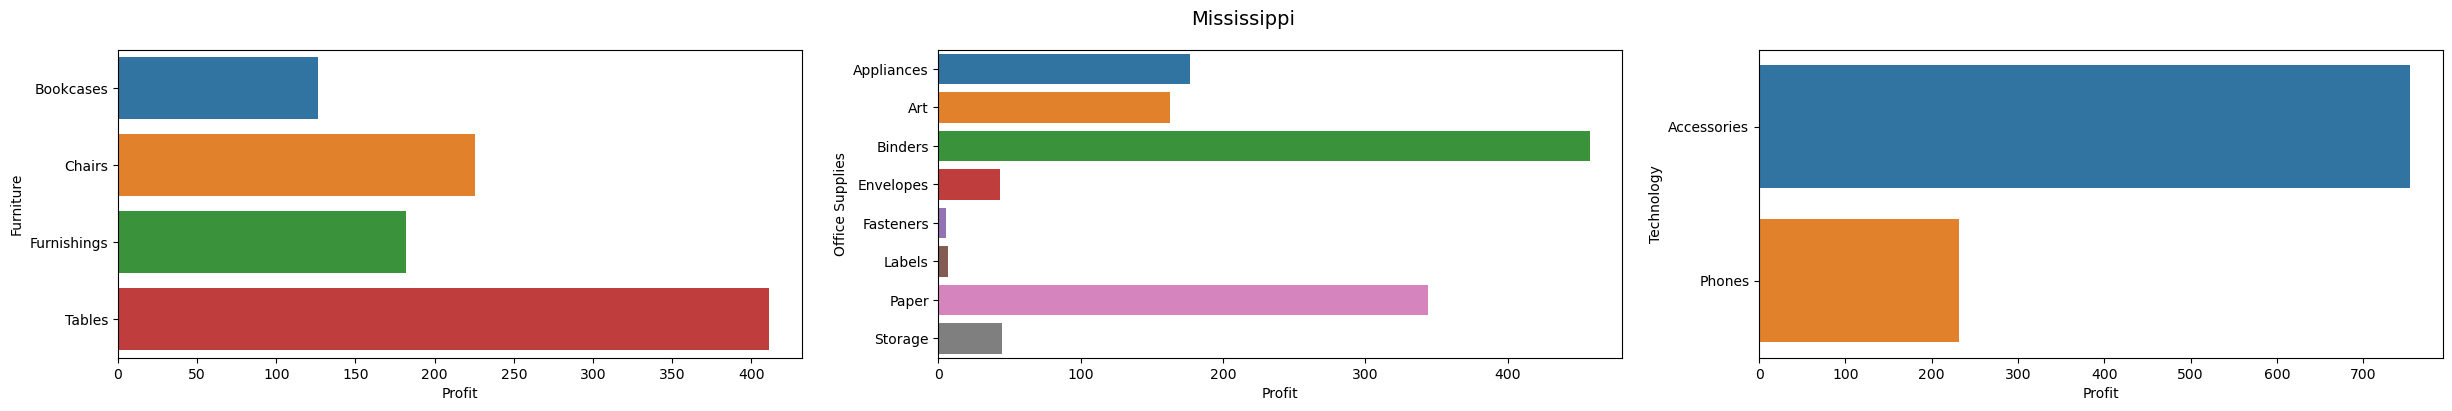

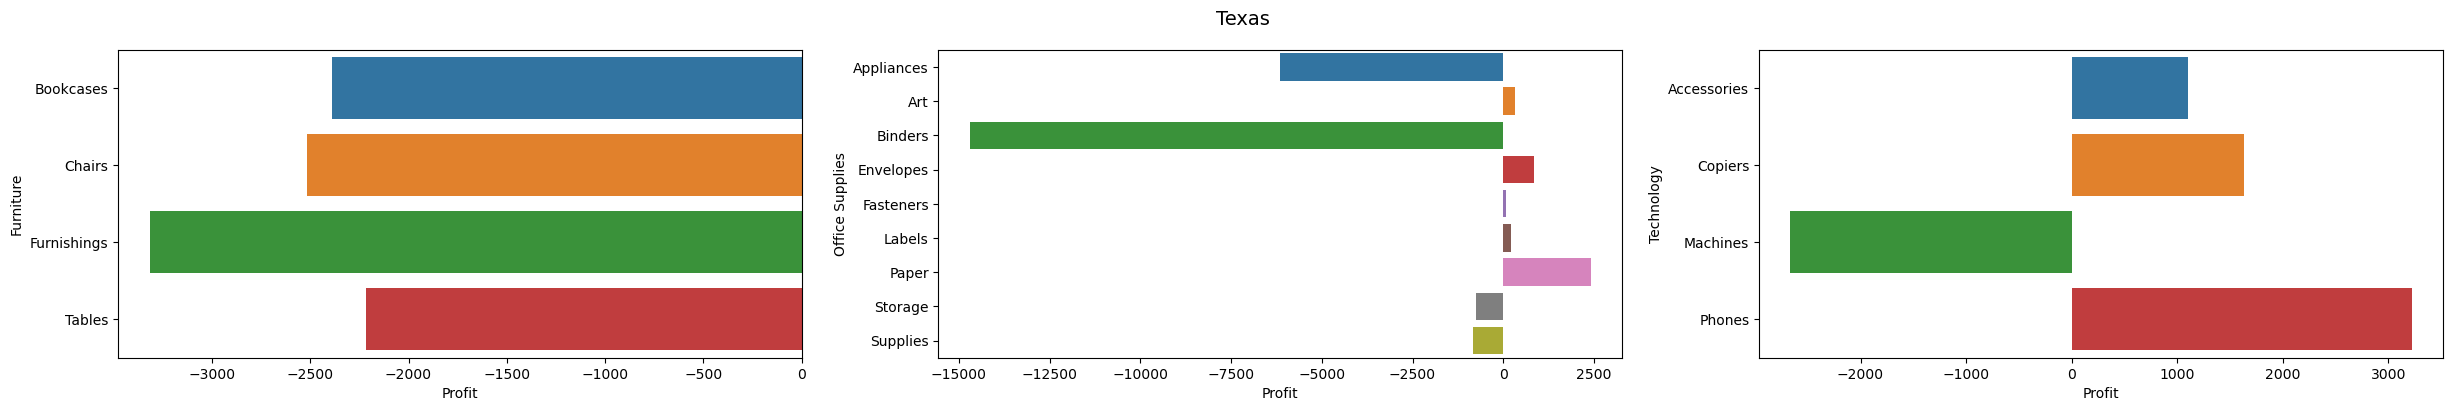

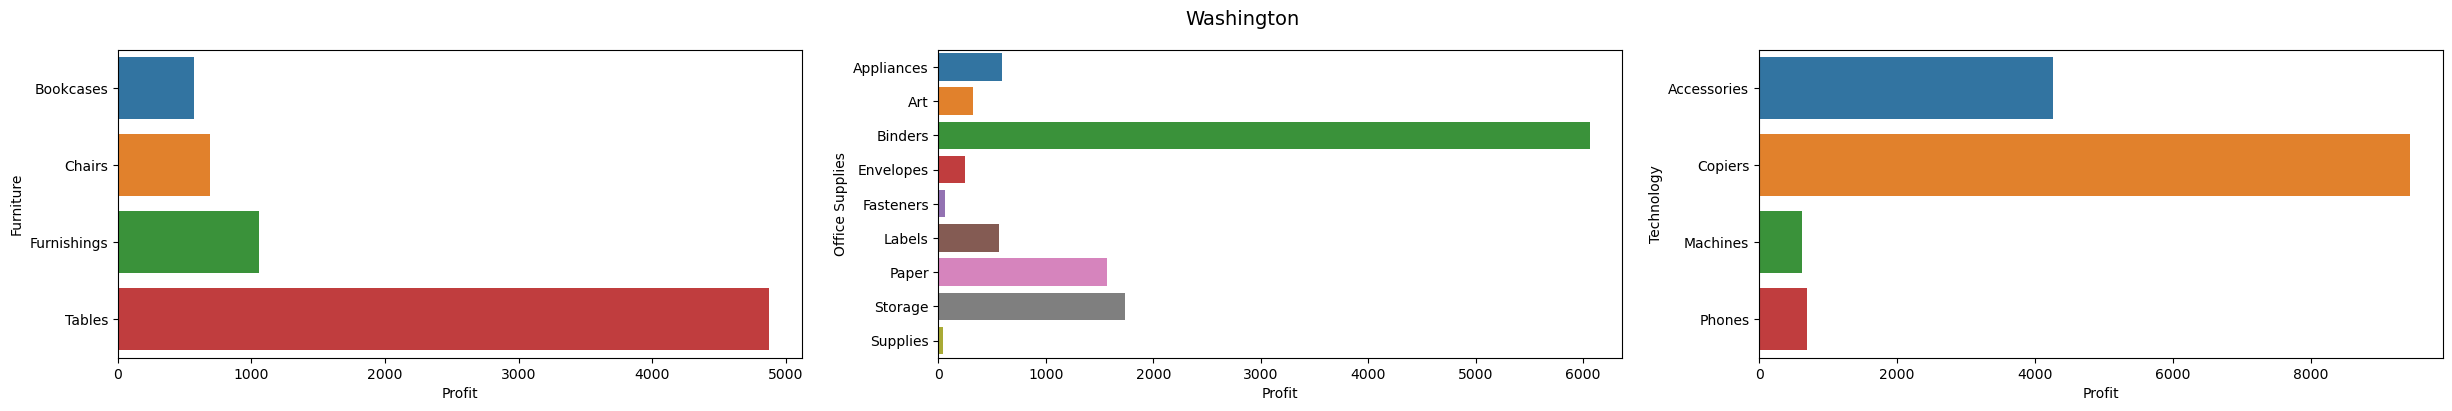

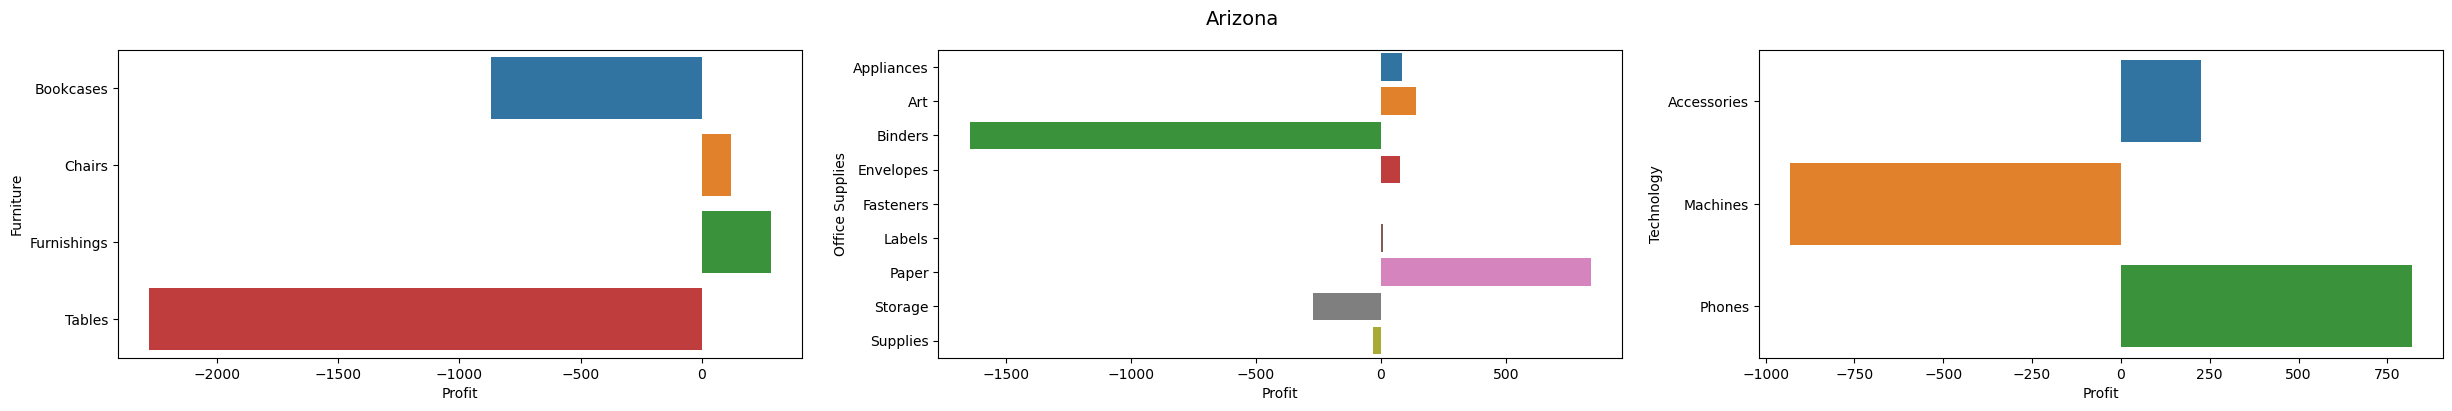

In [44]:
states =['California', 'Mississippi', 'Texas','Washington','Arizona']
state_data_viewer(states)


,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


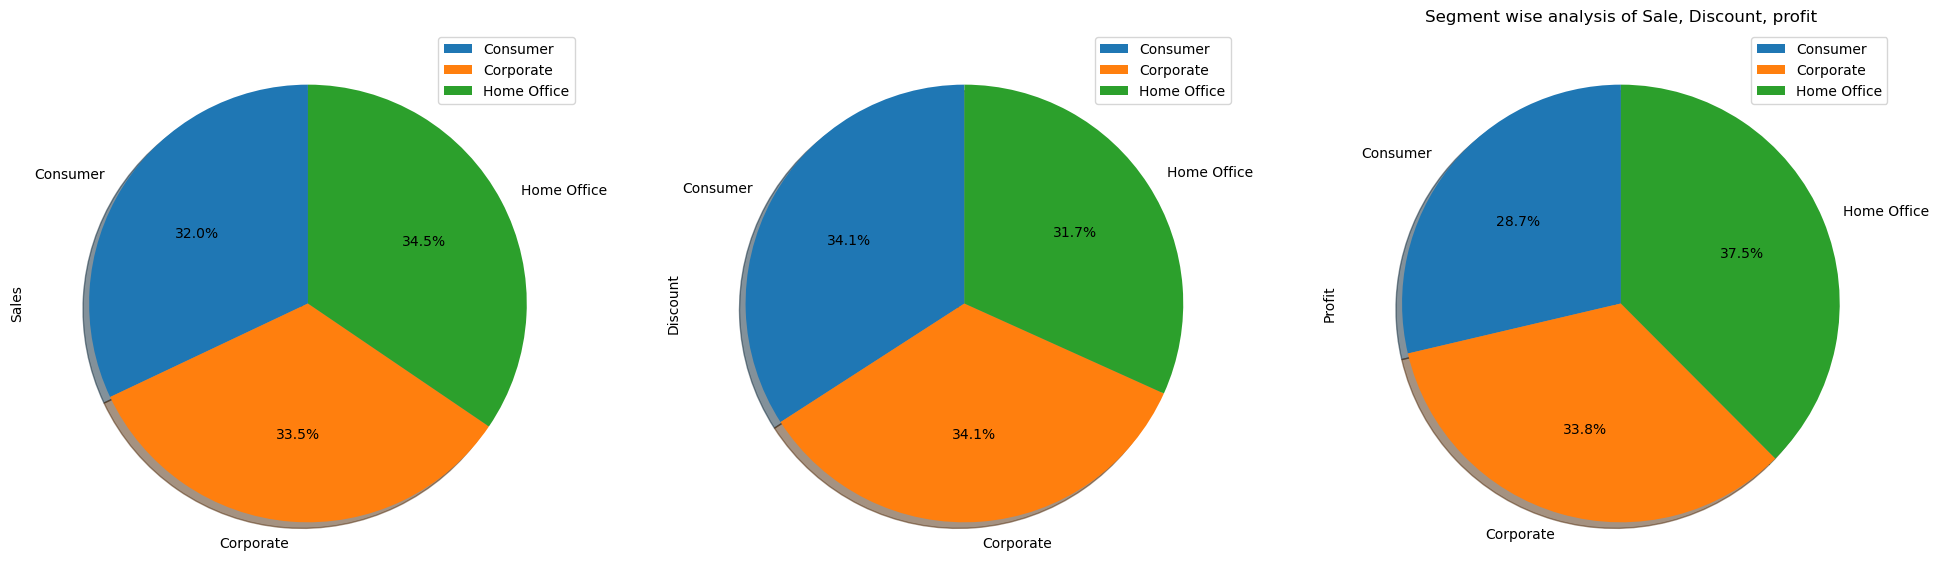

In [37]:
df_segment= df.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(24, 20),
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment wise analysis of Sale, Discount, profit')
df_segment

Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, profit')

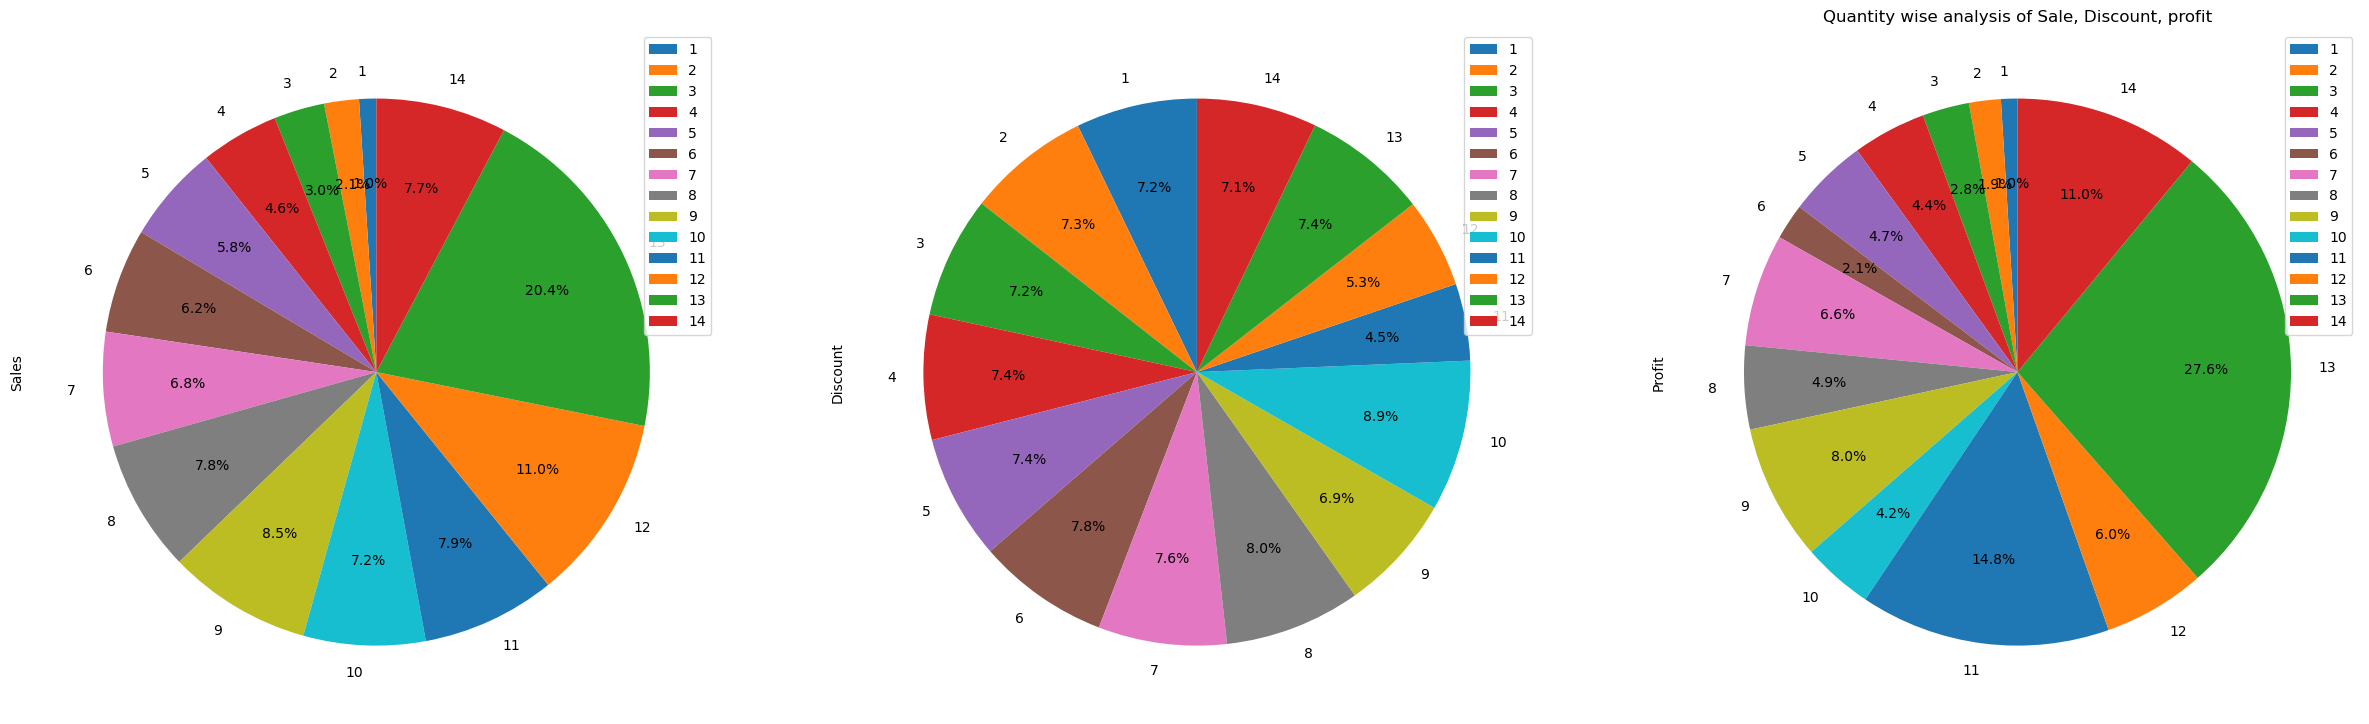

In [49]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.head(10)
df_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(30, 30),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                
                    labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit')